In [91]:
#https://www.youtube.com/watch?v=jztwpsIzEGc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil

import tensorflow as tf
import os
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

TensorFlow version: 2.16.2
Num GPUs Available:  0


# Limit CPU or GPU utilization

In [5]:

gpu = tf.config.experimental.list_physical_devices('GPU')
len(gpu) #Tensorflow only supports NVidia graphs card and not AMD GPUs

0

In [11]:
cpus = tf.config.experimental.list_physical_devices('CPU')
len(cpu)
#for cpu in cpus:
#    tf.config.experimental.set_memory_growth(cpu,True)

2

# Remove corrupted Images

In [2]:
import cv2
#Find alternative to imghdr
import imghdr

/var/folders/yp/nnhfbx9n055106j0nvvkcwlr0000gn/T/ipykernel_38850/1561739119.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [3]:
data_dir = '/Volumes/Datasets/HandGesture/train'
image_exts = ['png']

### Remove corrupted images/files

In [4]:
#iterates through each folder
for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    
    #skip if not a directory
    if not os.path.isdir(class_path):
        print(f"Skipping {class_path} as it is not a directory")
        continue
    
           
    #iterates through each image in the folder
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            #If not a valid image
            img = cv2.imread(image_path)
            if img is None:
                print(f'issue with image path: {image_path}')
                #Removes image
                os.remove(image_path)
                continue

            #If not a valid image extension
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image.path))
                #Removes image
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
    

KeyboardInterrupt: 

### Seperate images to their right classes

In [3]:
path = '/Volumes/Datasets/HandGesture/'

In [5]:



# Create classes (directories) if they don't exist
for dir_name in ['Left Swipe', 'Thumbs Down', 'Stop Gesture', 'Thumbs Up', 'Right Swipe']:
    target_dir_path = os.path.join(path, dir_name)
    if not os.path.exists(target_dir_path):
        os.makedirs(target_dir_path)


keywords_to_dirs ={
    'Left Swipe': 'Left Swipe',
    'Thumbs Down': 'Thumbs Down',
    'Stop Gesture': 'Stop Gesture',
    'Thumbs Up': 'Thumbs Up',
    'Right Swipe': 'Right Swipe'
}

''' 
# Iterate through the directories and subdirectories
for root, dirs, files in os.walk(os.path.join(path, 'train')):
    for dir_name in dirs:
        for keyword, target_dir in keywords_to_dirs.items():
            if keyword in dir_name:
                source_dir = os.path.join(root, dir_name)
                
                # Full path to the target directory where files should be copied
                full_target_dir = os.path.join(path, target_dir)
                
                # Copy each file in the source directory to the target directory
                for file_name in os.listdir(source_dir):
                    file_path = os.path.join(source_dir, file_name)
                    if os.path.isfile(file_path):  # Ensure it's a file
                        shutil.copy(file_path, full_target_dir)
                        print(f"Copied {file_name} to {full_target_dir}")

print("Files copied successfully.")

'''

Copied WIN_20180907_15_48_25_Pro_00011.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_48_25_Pro_00010.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_48_25_Pro_00012.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_48_25_Pro_00006.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_48_25_Pro_00007.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_48_25_Pro_00013.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_48_25_Pro_00017.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_48_25_Pro_00016.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_48_25_Pro_00014.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_48_25_Pro_00028.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_48_25_Pro_00029.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_48_25_Pro

Copied WIN_20180907_16_26_02_Pro_00061.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_26_02_Pro_00063.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_26_02_Pro_00039.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_26_02_Pro_00011.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_26_02_Pro_00013.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_26_02_Pro_00017.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_26_02_Pro_00029.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_26_02_Pro_00015.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_26_02_Pro_00031.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_26_02_Pro_00025.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_26_02_Pro_00019.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_26_02_Pro_00033.png to /Volumes

Copied WIN_20180907_16_05_58_Pro_00052.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_05_58_Pro_00044.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_05_58_Pro_00050.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_05_58_Pro_00054.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_05_58_Pro_00040.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_05_58_Pro_00068.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_05_58_Pro_00056.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_05_58_Pro_00042.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_05_58_Pro_00066.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_05_58_Pro_00058.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_05_58_Pro_00064.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_1

Copied WIN_20180907_16_17_00_Pro_00027.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_17_00_Pro_00033.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_17_00_Pro_00019.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_17_00_Pro_00025.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_17_00_Pro_00031.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_17_00_Pro_00015.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_17_00_Pro_00029.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_17_00_Pro_00017.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_17_00_Pro_00013.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_17_00_Pro_00011.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_17_00_Pro_00039.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_17_00_Pro

Copied WIN_20180907_15_44_32_Pro_00049.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_44_32_Pro_00061.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_44_32_Pro_00059.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_44_32_Pro_00065.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_44_32_Pro_00029.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_44_32_Pro_00015.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_44_32_Pro_00017.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_44_32_Pro_00007.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_44_32_Pro_00013.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_44_32_Pro_00039.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_44_32_Pro_00011.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_44_13_Pro

Copied WIN_20180907_16_24_20_Pro_00032.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_24_20_Pro_00026.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_24_20_Pro_00030.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_24_20_Pro_00024.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_24_20_Pro_00018.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_24_20_Pro_00019.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_24_20_Pro_00025.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_24_20_Pro_00031.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_06_32_Pro_00059.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_06_32_Pro_00049.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_06_32_Pro_00061.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_06_32_Pro_00039

Copied WIN_20180907_15_52_03_Pro_00014.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_52_03_Pro_00028.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_52_03_Pro_00016.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_40_47_Pro_00016.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_40_47_Pro_00017.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_40_47_Pro_00029.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_40_47_Pro_00015.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_40_47_Pro_00014.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_40_47_Pro_00028.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_40_47_Pro_00010.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_40_47_Pro_00011.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_40_47_

Copied WIN_20180907_16_33_15_Pro_00028.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_33_15_Pro_00014.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_33_15_Pro_00016.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_33_15_Pro_00058.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_33_15_Pro_00062.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_33_15_Pro_00048.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_33_15_Pro_00060.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_33_15_Pro_00050.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_33_15_Pro_00044.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_33_15_Pro_00052.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_33_15_Pro_00046.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_33_15_Pro_00042.png 

Copied WIN_20180907_16_01_20_Pro_00028.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_01_20_Pro_00014.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_01_20_Pro_00030.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_01_20_Pro_00024.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_01_20_Pro_00018.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_01_20_Pro_00032.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_01_20_Pro_00026.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_01_20_Pro_00022.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_01_20_Pro_00036.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_01_20_Pro_00020.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_01_20_Pro_00034.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_01_20_Pro_00046.png to /Volumes

Copied WIN_20180907_16_30_30_Pro_00036.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_30_30_Pro_00022.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_30_30_Pro_00050.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_30_30_Pro_00044.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_30_30_Pro_00052.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_30_30_Pro_00046.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_30_30_Pro_00042.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_30_30_Pro_00056.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_30_30_Pro_00040.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_30_30_Pro_00054.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_40_59_Pro_00048.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_40_59_Pro_00060.png to /Volume

Copied WIN_20180907_16_30_24_Pro_00042.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_30_24_Pro_00056.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_30_24_Pro_00052.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_30_24_Pro_00046.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_30_24_Pro_00050.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_30_24_Pro_00044.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_38_23_Pro_00045.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_38_23_Pro_00051.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_38_23_Pro_00047.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_38_23_Pro_00053.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_38_23_Pro_00057.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_38_23_Pro_000

Copied WIN_20180907_16_25_19_Pro_00028.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_25_19_Pro_00014.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_25_19_Pro_00016.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_25_19_Pro_00012.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_25_19_Pro_00038.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_25_19_Pro_00062.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_25_19_Pro_00048.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_25_19_Pro_00060.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_25_19_Pro_00058.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_25_19_Pro_00064.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_25_19_Pro_00070.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_25_19_Pro

Copied WIN_20180907_16_53_36_Pro_00060.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_53_36_Pro_00062.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_53_36_Pro_00066.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_53_36_Pro_00058.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_53_36_Pro_00064.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_53_36_Pro_00070.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_53_36_Pro_00040.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_53_36_Pro_00054.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_53_36_Pro_00068.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_53_36_Pro_00042.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_53_36_Pro_00056.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_53_36_Pro

Copied WIN_20180907_16_42_55_Pro_00016.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_42_55_Pro_00032.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_42_55_Pro_00026.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_42_55_Pro_00018.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_42_55_Pro_00030.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_42_55_Pro_00024.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_42_55_Pro_00008.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_42_55_Pro_00020.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_42_55_Pro_00034.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_42_55_Pro_00022.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_42_55_Pro_00036.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_42_55_Pro_00044.png to /Volumes

Copied WIN_20180907_16_01_34_Pro_00027.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_01_34_Pro_00033.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_01_34_Pro_00019.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_01_34_Pro_00025.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_01_34_Pro_00031.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_01_34_Pro_00043.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_01_34_Pro_00057.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_01_34_Pro_00041.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_01_34_Pro_00055.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_01_34_Pro_00051.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_01_34_Pro_00045.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_01_34_Pro_00053.png 

Copied WIN_20180907_16_56_18_Pro_00045.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_56_18_Pro_00053.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_56_18_Pro_00047.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_56_18_Pro_00043.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_56_18_Pro_00057.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_56_18_Pro_00041.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_56_18_Pro_00055.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_54_21_Pro_00025.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_54_21_Pro_00031.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_54_21_Pro_00019.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_54_21_Pro_00027.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_54

Copied WIN_20180907_15_48_01_Pro_00046.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_48_01_Pro_00052.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_41_13_Pro_00010.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_41_13_Pro_00004.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_41_13_Pro_00005.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_41_13_Pro_00011.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_41_13_Pro_00007.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_41_13_Pro_00013.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_41_13_Pro_00012.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_41_13_Pro_00006.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_41_13_Pro_00016.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_41_13_P

Copied WIN_20180907_15_53_00_Pro_00008.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_53_00_Pro_00020.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_53_00_Pro_00018.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_53_00_Pro_00030.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_53_00_Pro_00024.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_53_00_Pro_00025.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_53_00_Pro_00019.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_53_00_Pro_00027.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_53_00_Pro_00026.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_53_00_Pro_00003.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_53_00_Pro_00017.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_53_00_Pro

Copied WIN_20180907_16_43_19_Pro_00018.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_43_19_Pro_00026.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_43_19_Pro_00027.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_43_19_Pro_00016.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_43_19_Pro_00002.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_43_19_Pro_00003.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_43_19_Pro_00017.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_43_19_Pro_00015.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_43_19_Pro_00029.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_43_19_Pro_00028.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_43_19_Pro_00014.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_43_19_Pro

Copied WIN_20180907_16_07_57_Pro_00056.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_07_57_Pro_00058.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_07_57_Pro_00048.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_07_57_Pro_00060.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_07_57_Pro_00038.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_07_57_Pro_00010.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_07_57_Pro_00004.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_07_57_Pro_00012.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_07_57_Pro_00006.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_07_57_Pro_00002.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_07_57_Pro_00016.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_07_57_Pro_00028.png 

Copied WIN_20180907_15_38_17_Pro_00061.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_38_17_Pro_00049.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_38_17_Pro_00077.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_38_17_Pro_00063.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_38_17_Pro_00039.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_38_17_Pro_00029.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_56_12_Pro_00014.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_56_12_Pro_00028.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_56_12_Pro_00029.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_56_12_Pro_00015.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_56_12_Pro_00017.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_56_12_Pro_00016

Copied WIN_20180907_16_27_05_Pro_00025.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_27_05_Pro_00031.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_50_16_Pro_00052.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_50_16_Pro_00046.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_50_16_Pro_00050.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_50_16_Pro_00044.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_50_16_Pro_00040.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_50_16_Pro_00054.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_50_16_Pro_00068.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_50_16_Pro_00042.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_50_16_Pro_00056.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_50_16_Pro

Copied WIN_20180907_16_04_16_Pro_00043.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_04_16_Pro_00057.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_04_16_Pro_00053.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_04_16_Pro_00047.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_04_16_Pro_00051.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_04_16_Pro_00045.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_04_16_Pro_00037.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_04_16_Pro_00023.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_04_16_Pro_00035.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_04_16_Pro_00021.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_04_16_Pro_00009.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_04_16_Pro_00025.png to /Volumes

Copied WIN_20180907_16_37_37_Pro_00057.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_37_37_Pro_00019.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_37_37_Pro_00025.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_37_37_Pro_00031.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_37_37_Pro_00027.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_37_37_Pro_00033.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_37_37_Pro_00037.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_37_37_Pro_00023.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_37_37_Pro_00009.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_37_37_Pro_00035.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_37_37_Pro_00021.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_37_37_Pro_00011.png 

Copied WIN_20180907_15_56_07_Pro_00052.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_56_07_Pro_00046.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_56_07_Pro_00050.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_56_07_Pro_00044.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_56_07_Pro_00048.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_56_07_Pro_00060.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_56_07_Pro_00062.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_56_07_Pro_00066.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_56_07_Pro_00058.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_56_07_Pro_00064.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_56_07_Pro_00070.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_1

Copied WIN_20180907_16_41_09_Pro_00036.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_41_09_Pro_00020.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_41_09_Pro_00034.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_41_09_Pro_00008.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_41_09_Pro_00046.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_41_09_Pro_00052.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_41_09_Pro_00044.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_41_09_Pro_00050.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_41_09_Pro_00054.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_41_09_Pro_00040.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_41_09_Pro_00056.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_41_09_Pro_00042.png to /Volumes

Copied WIN_20180907_16_04_43_Pro_00009.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_04_43_Pro_00035.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_04_43_Pro_00021.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_04_43_Pro_00019.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_04_43_Pro_00025.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_04_43_Pro_00031.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_04_43_Pro_00027.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_04_43_Pro_00033.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_45_40_Pro_00063.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_45_40_Pro_00049.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_45_40_Pro_00061.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_45_4

Copied WIN_20180907_16_42_05_Pro_00015.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_42_05_Pro_00029.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_42_05_Pro_00017.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_42_05_Pro_00013.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_42_05_Pro_00039.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_42_05_Pro_00063.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_42_05_Pro_00061.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_42_05_Pro_00049.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_42_05_Pro_00065.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_42_05_Pro_00071.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_42_05_Pro_00059.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_16_42_05_Pro_00067.png to /Volumes

Copied WIN_20180907_16_25_22_Pro_00020.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_25_22_Pro_00018.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_25_22_Pro_00024.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_25_22_Pro_00030.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_25_22_Pro_00031.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_25_22_Pro_00025.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_25_22_Pro_00019.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_25_22_Pro_00033.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_25_22_Pro_00027.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_25_22_Pro_00026.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_25_22_Pro_00032.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_25_22_Pro

Copied WIN_20180907_15_53_12_Pro_00029.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_53_12_Pro_00019.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_53_12_Pro_00025.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_53_12_Pro_00031.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_53_12_Pro_00027.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_53_12_Pro_00033.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_53_12_Pro_00037.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_53_12_Pro_00023.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_53_12_Pro_00035.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_53_12_Pro_00021.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_53_12_Pro_00053.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_53_12_Pro_00047.png to /Volumes

Copied WIN_20180907_16_08_46_Pro_00022.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_08_46_Pro_00023.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_08_46_Pro_00027.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_08_46_Pro_00033.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_08_46_Pro_00032.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_08_46_Pro_00026.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_08_46_Pro_00018.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_08_46_Pro_00030.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_08_46_Pro_00024.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_08_46_Pro_00025.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_08_46_Pro_00031.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_08_46_Pro

Copied WIN_20180907_16_06_16_Pro_00023.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_06_16_Pro_00027.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_06_16_Pro_00033.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_06_16_Pro_00019.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_06_16_Pro_00025.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_06_16_Pro_00031.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_22_03_Pro_00045.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_22_03_Pro_00051.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_22_03_Pro_00047.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_22_03_Pro_00053.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_22_03_Pro_00057.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_22_03_Pro_00043.png 

Copied WIN_20180907_15_39_51_Pro_00010.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_39_51_Pro_00012.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_39_51_Pro_00016.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_39_51_Pro_00028.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_39_51_Pro_00014.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_39_51_Pro_00066.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_39_51_Pro_00058.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_39_51_Pro_00064.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_39_51_Pro_00048.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_39_51_Pro_00060.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_39_51_Pro_00062.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_1

Copied WIN_20180907_16_29_34_Pro_00024.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_29_34_Pro_00030.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_29_34_Pro_00018.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_29_34_Pro_00042.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_29_34_Pro_00056.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_29_34_Pro_00040.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_29_34_Pro_00054.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_29_34_Pro_00068.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_29_34_Pro_00050.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_29_34_Pro_00044.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_29_34_Pro_00052.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_29_34_Pro

Copied WIN_20180907_15_58_45_Pro_00048.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_58_45_Pro_00060.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_58_45_Pro_00062.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_58_45_Pro_00052.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_58_45_Pro_00046.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_58_45_Pro_00050.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_58_45_Pro_00044.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_58_45_Pro_00040.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_58_45_Pro_00054.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_58_45_Pro_00042.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_58_45_Pro_00056.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_58_45_Pro_00024.png 

Copied WIN_20180907_15_50_33_Pro_00041.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_50_33_Pro_00055.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_50_33_Pro_00069.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_50_33_Pro_00043.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_50_33_Pro_00057.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_50_33_Pro_00025.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_50_33_Pro_00031.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_50_33_Pro_00019.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_50_33_Pro_00027.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_50_33_Pro_00033.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_50_33_Pro_00037.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_50_33_Pro_00023.png 

Copied WIN_20180907_16_11_00_Pro_00025.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_11_00_Pro_00031.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_11_00_Pro_00019.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_11_00_Pro_00035.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_11_00_Pro_00021.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_11_00_Pro_00020.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_11_00_Pro_00034.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_11_00_Pro_00022.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_11_00_Pro_00036.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_11_00_Pro_00037.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_11_00_Pro_00023.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_22_23_Pro

Copied WIN_20180907_16_30_13_Pro_00035.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_30_13_Pro_00021.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_30_13_Pro_00037.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_30_13_Pro_00023.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_12_09_Pro_00046.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_12_09_Pro_00052.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_12_09_Pro_00044.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_12_09_Pro_00050.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_12_09_Pro_00068.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_12_09_Pro_00054.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_12_09_Pro_00040.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_12

Copied WIN_20180907_15_57_35_Pro_00015.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_57_35_Pro_00029.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_57_35_Pro_00017.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_57_35_Pro_00013.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_57_35_Pro_00011.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_57_35_Pro_00039.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_57_35_Pro_00063.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_57_35_Pro_00061.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_57_35_Pro_00049.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_57_35_Pro_00065.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_57_35_Pro_00059.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_57_35_Pro_00067.png to /Volumes

Copied WIN_20180907_16_11_36_Pro_00041.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_11_36_Pro_00069.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_11_36_Pro_00057.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_11_36_Pro_00043.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_11_36_Pro_00031.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_11_36_Pro_00025.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_11_36_Pro_00019.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_11_36_Pro_00033.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_11_36_Pro_00027.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_11_36_Pro_00023.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_11_36_Pro_00037.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_11_36_Pro

Copied WIN_20180907_16_58_34_Pro_00056.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_58_34_Pro_00042.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_58_34_Pro_00046.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_58_34_Pro_00052.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_58_34_Pro_00044.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_58_34_Pro_00050.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_58_34_Pro_00060.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_58_34_Pro_00048.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_58_34_Pro_00062.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_58_34_Pro_00066.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_58_34_Pro_00064.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_58_34_Pro

Copied WIN_20180907_15_44_55_Pro_00052.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_44_55_Pro_00044.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_44_55_Pro_00050.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_44_55_Pro_00060.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_44_55_Pro_00048.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_44_55_Pro_00062.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_44_55_Pro_00066.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_44_55_Pro_00064.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_44_55_Pro_00058.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_44_55_Pro_00016.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_44_55_Pro_00014.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_1

Copied WIN_20180907_15_53_18_Pro_00052.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_15_53_18_Pro_00046.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_15_53_18_Pro_00034.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_15_53_18_Pro_00020.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_15_53_18_Pro_00036.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_15_53_18_Pro_00022.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_15_53_18_Pro_00026.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_15_53_18_Pro_00032.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_15_53_18_Pro_00018.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_15_53_18_Pro_00024.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_15_53_18_Pro_00030.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_15_51_07_Pro

Copied WIN_20180907_16_33_59_Pro_00017.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_33_59_Pro_00015.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_33_59_Pro_00029.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_33_59_Pro_00039.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_15_55_27_Pro_00010.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_55_27_Pro_00011.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_55_27_Pro_00013.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_55_27_Pro_00012.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_55_27_Pro_00016.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_55_27_Pro_00017.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_55_27_Pro_00015.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_15_55_27_Pro

Copied WIN_20180907_16_05_08_Pro_00068.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_05_08_Pro_00054.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_05_08_Pro_00040.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_05_08_Pro_00056.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_05_08_Pro_00042.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_05_08_Pro_00046.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_05_08_Pro_00052.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_05_08_Pro_00044.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_05_08_Pro_00050.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_05_08_Pro_00022.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_05_08_Pro_00036.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_1

Copied WIN_20180907_15_57_30_Pro_00031.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_57_30_Pro_00025.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_57_30_Pro_00021.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_57_30_Pro_00035.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_57_30_Pro_00023.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_57_30_Pro_00037.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_57_30_Pro_00045.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_57_30_Pro_00051.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_57_30_Pro_00047.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_57_30_Pro_00053.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_57_30_Pro_00057.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_1

Copied WIN_20180907_15_39_54_Pro_00027.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_39_54_Pro_00055.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_39_54_Pro_00041.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_39_54_Pro_00057.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_39_54_Pro_00043.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_39_54_Pro_00047.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_39_54_Pro_00053.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_39_54_Pro_00045.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_39_54_Pro_00051.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_39_54_Pro_00061.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_39_54_Pro_00049.png to /Volumes/Datasets/HandGesture/Thumbs Up
Copied WIN_20180907_15_39_54_Pro_00063.png to /Volumes

Copied WIN_20180907_16_12_16_Pro_00034.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_12_16_Pro_00020.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_12_16_Pro_00021.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_12_16_Pro_00035.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_12_16_Pro_00031.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_12_16_Pro_00025.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_12_16_Pro_00019.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_12_16_Pro_00018.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_12_16_Pro_00024.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_12_16_Pro_00030.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_12_16_Pro_00026.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_12_16_Pro

Copied WIN_20180907_16_38_29_Pro_00060.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_38_29_Pro_00074.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_38_29_Pro_00062.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_38_29_Pro_00076.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_38_29_Pro_00072.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_38_29_Pro_00066.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_38_29_Pro_00058.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_38_29_Pro_00070.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_38_29_Pro_00064.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_38_29_Pro_00028.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_38_29_Pro_00038.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_44_36_Pro_00034.png 

Copied WIN_20180907_15_52_28_Pro_00026.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_52_28_Pro_00032.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_52_28_Pro_00018.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_52_28_Pro_00024.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_15_52_28_Pro_00030.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_10_07_Pro_00017.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_10_07_Pro_00016.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_10_07_Pro_00028.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_10_07_Pro_00015.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_10_07_Pro_00029.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_10_07_Pro_00039.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_10_07_Pro_0003

Copied WIN_20180907_16_37_03_Pro_00024.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_37_03_Pro_00030.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_37_03_Pro_00018.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_37_03_Pro_00026.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_37_03_Pro_00032.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_37_03_Pro_00036.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_37_03_Pro_00022.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_37_03_Pro_00034.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_37_03_Pro_00020.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_37_03_Pro_00052.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_37_03_Pro_00046.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_37_03_Pro

Copied WIN_20180907_16_25_52_Pro_00023.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_25_52_Pro_00027.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_25_52_Pro_00033.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_25_52_Pro_00032.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_25_52_Pro_00026.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_25_52_Pro_00030.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_25_52_Pro_00024.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_25_52_Pro_00018.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_25_52_Pro_00019.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_25_52_Pro_00025.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_25_52_Pro_00031.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_25_52_Pro

Copied WIN_20180907_16_19_10_Pro_00040.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_19_10_Pro_00056.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_19_10_Pro_00042.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_19_10_Pro_00046.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_19_10_Pro_00052.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_19_10_Pro_00044.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_19_10_Pro_00050.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_19_10_Pro_00060.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_19_10_Pro_00048.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_19_10_Pro_00062.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_19_10_Pro_00066.png to /Volumes/Datasets/HandGesture/Left Swipe
Copied WIN_20180907_16_19_10_Pro_00070.png 

Copied WIN_20180907_16_19_27_Pro_00039.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_19_27_Pro_00015.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_19_27_Pro_00029.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_19_27_Pro_00017.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_19_27_Pro_00071.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_19_27_Pro_00065.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_19_27_Pro_00059.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_19_27_Pro_00067.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_19_27_Pro_00063.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_19_27_Pro_00061.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_19_27_Pro_00049.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_1

Copied WIN_20180907_15_43_28_Pro_00047.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_15_43_28_Pro_00053.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_15_43_28_Pro_00057.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_15_43_28_Pro_00043.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_15_43_28_Pro_00055.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_15_43_28_Pro_00041.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_15_43_28_Pro_00069.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_07_43_Pro_00021.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_07_43_Pro_00035.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_07_43_Pro_00023.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_07_43_Pro_00037.png to /Volumes/Datasets/HandGesture/Right Swipe
Copied WIN_20180907_16_07_43_Pro

Copied WIN_20180907_15_59_12_Pro_00034.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_59_12_Pro_00022.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_15_59_12_Pro_00036.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_01_35_Pro_00032.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_01_35_Pro_00026.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_01_35_Pro_00027.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_01_35_Pro_00033.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_01_35_Pro_00025.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_01_35_Pro_00031.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_01_35_Pro_00019.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_01_35_Pro_00018.png to /Volumes/Datasets/HandGesture/Thumbs Down
Copied WIN_20180907_16_01_35_

Copied WIN_20180907_16_28_15_Pro_00010.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_28_15_Pro_00012.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_28_15_Pro_00006.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_28_15_Pro_00048.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_28_15_Pro_00060.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_28_15_Pro_00062.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_28_15_Pro_00058.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_28_15_Pro_00064.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_28_15_Pro_00040.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_28_15_Pro_00054.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_28_15_Pro_00042.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_1

Copied WIN_20180907_16_18_59_Pro_00020.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_18_59_Pro_00034.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_18_59_Pro_00022.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_18_59_Pro_00036.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_18_59_Pro_00032.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_18_59_Pro_00026.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_18_59_Pro_00030.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_18_59_Pro_00024.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_18_59_Pro_00018.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_18_59_Pro_00028.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_16_18_59_Pro_00014.png to /Volumes/Datasets/HandGesture/Stop Gesture
Copied WIN_20180907_1

# Import dataset

In [4]:
# List all the class subdirectories
all_classes = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
all_classes

['Left Swipe',
 'Thumbs Down',
 'Stop Gesture',
 'Thumbs Up',
 'Right Swipe',
 'raw train data',
 'train',
 'valid',
 'test',
 'models']

In [78]:
# Specify the classes (folders) you want to include
classes_to_include = ['Left Swipe', 'Right Swipe', 'Stop Gesture', 'Thumbs Down', 'Thumbs Up']

# Create the dataset including only the specified folders
data = tf.keras.utils.image_dataset_from_directory(
    path,
    labels='inferred',
    label_mode='int',
    class_names=classes_to_include,  # Specify the classes to include
    batch_size=32,
    image_size=(256, 256),
    shuffle=True
)

# Print out the included classes to verify
print(f"Included classes: {data.class_names}")

Found 5520 files belonging to 5 classes.
Included classes: ['Left Swipe', 'Right Swipe', 'Stop Gesture', 'Thumbs Down', 'Thumbs Up']


In [79]:
#convert the data to a numpy iterator
data_iterator = data.as_numpy_iterator()
#Select one of the folders
batch = data_iterator.next()


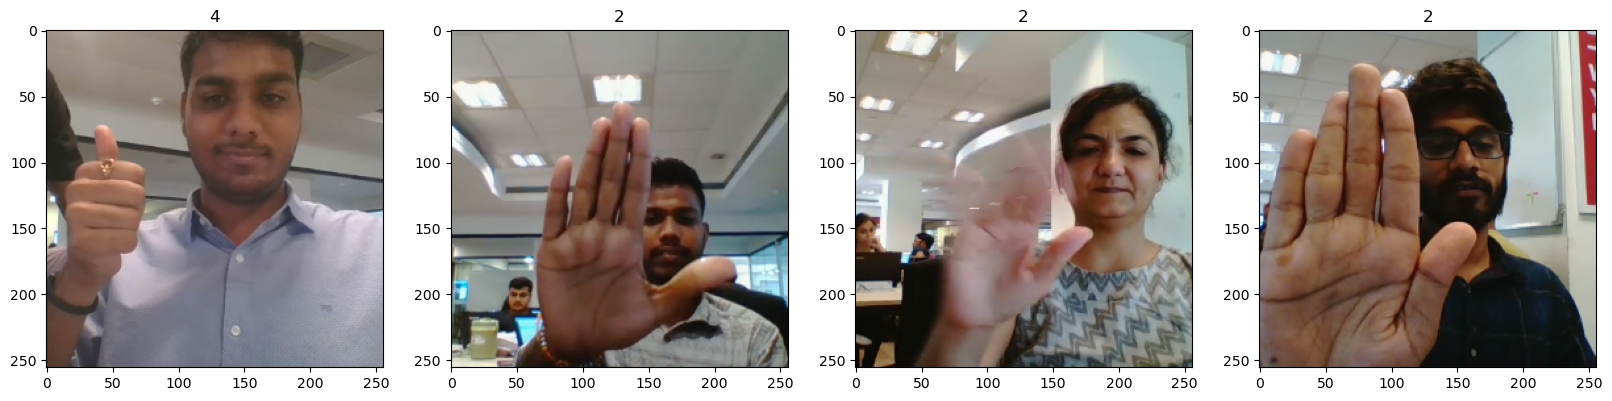

In [80]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
#Display first 4 images and their class
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


# Preprocessing Data

In [81]:
#Scale Data
#Makes the rgb scale which is from 0 to 255 to 0 to 1 instead for easier processing
data = data.map(lambda x,y: (x/255, y))

In [82]:
#Confirm data is scaled appropriately
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
#Results should be from 0 to 1
batch[0].max(), batch[0].min()

(1.0, 0.0)

### Split Data

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
len(data)

173

In [83]:
train_size = int(len(data)*.7) #70 percent of the data
val_size = int(len(data)*.2) #20% of the data
test_size = int(len(data)*.1)+1 #10 percent of the data +1

In [84]:
#Confirm the total matches the length of the whole dataset
val_size + train_size+ test_size

173

In [85]:
#Allocate a batch of data from dataset to train, val, test sets.
train = data.take(train_size)
val =  data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [86]:

# One-hot encode the labels
train = train.map(lambda x, y: (x, to_categorical(y, num_classes=5)))
val = val.map(lambda x, y: (x, to_categorical(y, num_classes=5)))

# Deep Model

In [62]:
#Build deep learning Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam


In [87]:
model = Sequential()

In [88]:
#Convolution scans over image and extracts it.
#16 is number of filters
#(3,3) represents 3 pixels by 3 pixels and check 1 at a time
model.add(Conv2D(16,(3,3),1, activation = 'relu', input_shape = (256,256,3)))
#Max pooling condenses the information down
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

#Condense the layer down to a single dimension
model.add(GlobalAveragePooling2D())

model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))


In [89]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss= tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [66]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 16)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,321 (55.94 KB)

 Trainable params: 14,321 (55.94 KB)

 Non-trainable params: 0 (0.00 B)

### Train data
Notes: Increasing the epochs to 30 increased accurracy. Accuracy was still increasing at 30 so should try more.

In [20]:
logdir = 'logs'

In [43]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= logdir)
#callbacks=[tensorboard_callback],

In [92]:
es = EarlyStopping(monitor= 'val_accuracy', patience = 5)
hist = model.fit(train, epochs = 30, validation_data = val, batch_size = 32,  callbacks = [es], verbose = 2)

Epoch 1/30
121/121 - 82s - 675ms/step - accuracy: 0.5142 - loss: 1.0399 - val_accuracy: 0.5607 - val_loss: 1.0034
Epoch 2/30
121/121 - 86s - 713ms/step - accuracy: 0.5261 - loss: 1.0200 - val_accuracy: 0.5257 - val_loss: 0.9826
Epoch 3/30
121/121 - 96s - 792ms/step - accuracy: 0.5341 - loss: 1.0075 - val_accuracy: 0.5524 - val_loss: 0.9824
Epoch 4/30
121/121 - 90s - 742ms/step - accuracy: 0.5473 - loss: 0.9851 - val_accuracy: 0.5882 - val_loss: 0.9426
Epoch 5/30
121/121 - 101s - 835ms/step - accuracy: 0.5635 - loss: 0.9642 - val_accuracy: 0.5910 - val_loss: 0.9319
Epoch 6/30
121/121 - 87s - 717ms/step - accuracy: 0.5671 - loss: 0.9459 - val_accuracy: 0.6121 - val_loss: 0.9044
Epoch 7/30
121/121 - 89s - 736ms/step - accuracy: 0.5775 - loss: 0.9267 - val_accuracy: 0.6103 - val_loss: 0.8961
Epoch 8/30
121/121 - 155s - 1s/step - accuracy: 0.5901 - loss: 0.9079 - val_accuracy: 0.6268 - val_loss: 0.8761
Epoch 9/30
121/121 - 200s - 2s/step - accuracy: 0.5999 - loss: 0.8889 - val_accuracy: 0.6

In [93]:
hist.history

{'accuracy': [0.5142045617103577,
  0.5260847210884094,
  0.5340909361839294,
  0.5472623705863953,
  0.5635330677032471,
  0.567148745059967,
  0.577479362487793,
  0.59013432264328,
  0.5999483466148376,
  0.6136363744735718,
  0.6211260557174683,
  0.6265496015548706,
  0.6283574104309082,
  0.6466942429542542,
  0.6528925895690918,
  0.66425621509552,
  0.6717458963394165,
  0.6789772510528564,
  0.694473147392273,
  0.7066115736961365,
  0.7097107172012329,
  0.7182334661483765,
  0.7334710955619812,
  0.7378615736961365,
  0.7492251992225647,
  0.7556818127632141,
  0.754648745059967,
  0.7590392827987671,
  0.7709194421768188,
  0.7724689841270447],
 'loss': [1.0399211645126343,
  1.019978404045105,
  1.0075056552886963,
  0.9851089119911194,
  0.9641839265823364,
  0.9459463357925415,
  0.9267393350601196,
  0.9079258441925049,
  0.888904333114624,
  0.8687862753868103,
  0.8490268588066101,
  0.8338888883590698,
  0.8126531839370728,
  0.790084183216095,
  0.770987868309021,
 

# Plot performance

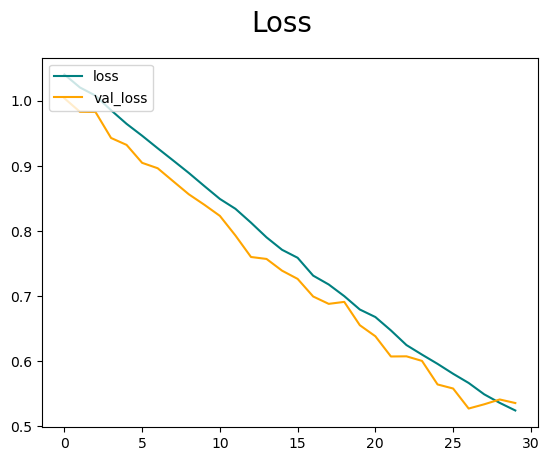

In [94]:
fig = plt.figure()
plt.plot(hist.history['loss'],  color = 'teal', label='loss')
plt.plot(hist.history['val_loss'],  color = 'orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()


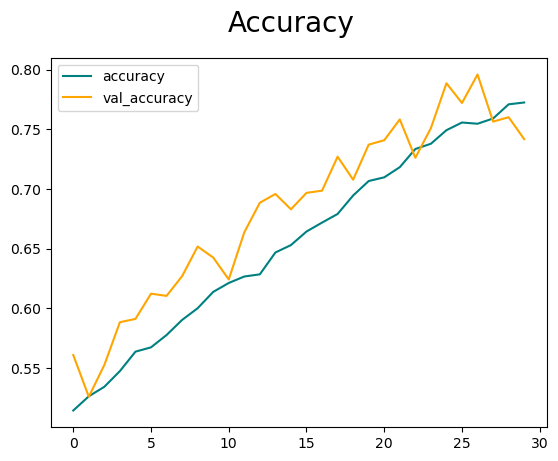

In [95]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],  color = 'teal', label='accuracy')
plt.plot(hist.history['val_accuracy'],  color = 'orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

# Evaluate Performance

In [96]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [100]:
pre = Precision()
re = Recall()
acc= BinaryAccuracy()

In [102]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2024-08-23 08:12:05.897584: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: /Volumes/Datasets/HandGesture/Stop Gesture/WIN_20180907_15_39_51_Pro_00026.png; No such file or directory
2024-08-23 08:12:05.897921: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: /Volumes/Datasets/HandGesture/Thumbs Down/WIN_20180907_16_11_00_Pro_00033.png; No such file or directory
2024-08-23 08:12:05.897940: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: /Volumes/Datasets/HandGesture/Thumbs Up/WIN_20180907_16_42_05_Pro_00041.png; No such file or directory
2024-08-23 08:12:05.897984: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: /Volumes/Datasets/HandGesture/Left Swipe/WIN_20180907_15_50_05_Pro_00057.png; No such file or directory
2024-08-23 08:12:05.898005: W tens

NotFoundError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} /Volumes/Datasets/HandGesture/Thumbs Down/WIN_20180907_16_11_00_Pro_00033.png; No such file or directory
	 [[{{node ReadFile}}]] [Op:IteratorGetNext] name: 

In [101]:
print(f'precision: {pre.result()} Recall: {re.result()} Accuracy: {acc.result()}')

precision: 0.0 Recall: 0.0 Accuracy: 0.0


# Confusion Matrix

In [103]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    '''This function prints and plots the confursion matrix.
    Normalization can be applied by setting "normalize=True".'''
    
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i,j], horizontalalignment ='center', color='white' if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=1))

In [ ]:
test_batches.class_indices

In [ ]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title = 'Confusion Matrix')

# Test

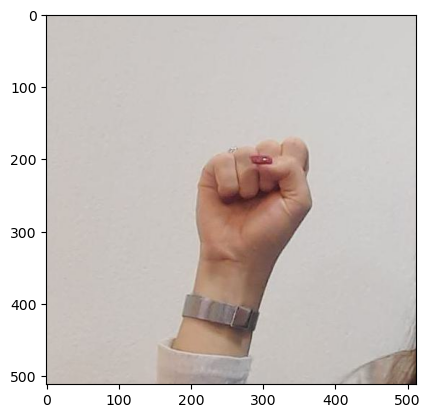

In [73]:
#Import never before seen image
img = cv2.imread('0a8d2460-bcf0-4fd6-9851-25e73eacebd7.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

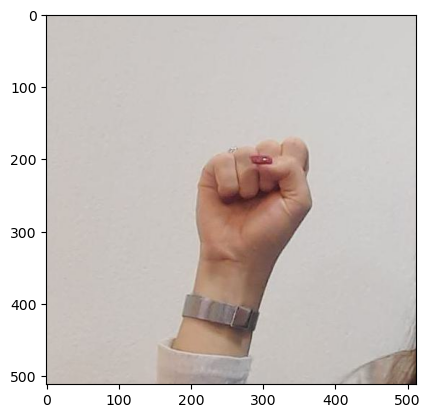

In [78]:
#Resize image
resize = tf.image.resize(img, (224,224))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [79]:
#Predict model
#using np.expand_dims shows the single picture as a batch of pictures as that is what the model expects.
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [80]:
#Since our dataset has more than one class this result tells us nothing
yhat

array([[1.]], dtype=float32)

# Save the model

In [83]:
from tensorflow.keras.models import load_model

In [99]:
#save model, the 'models' parameter creates a folder named models
code_path = '/Volumes/Datasets/HandGesture/models'
model.save(os.path.join(code_path,'handgesturemodelV1.keras'))

In [86]:
#load/import model
new_model = load_model(os.path.join('models', 'handgesturemodel.keras'))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [89]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


array([[1.]], dtype=float32)